1. Choose a model
2. Choose a loss function
3. Fit the model
4. Evaluate model performance

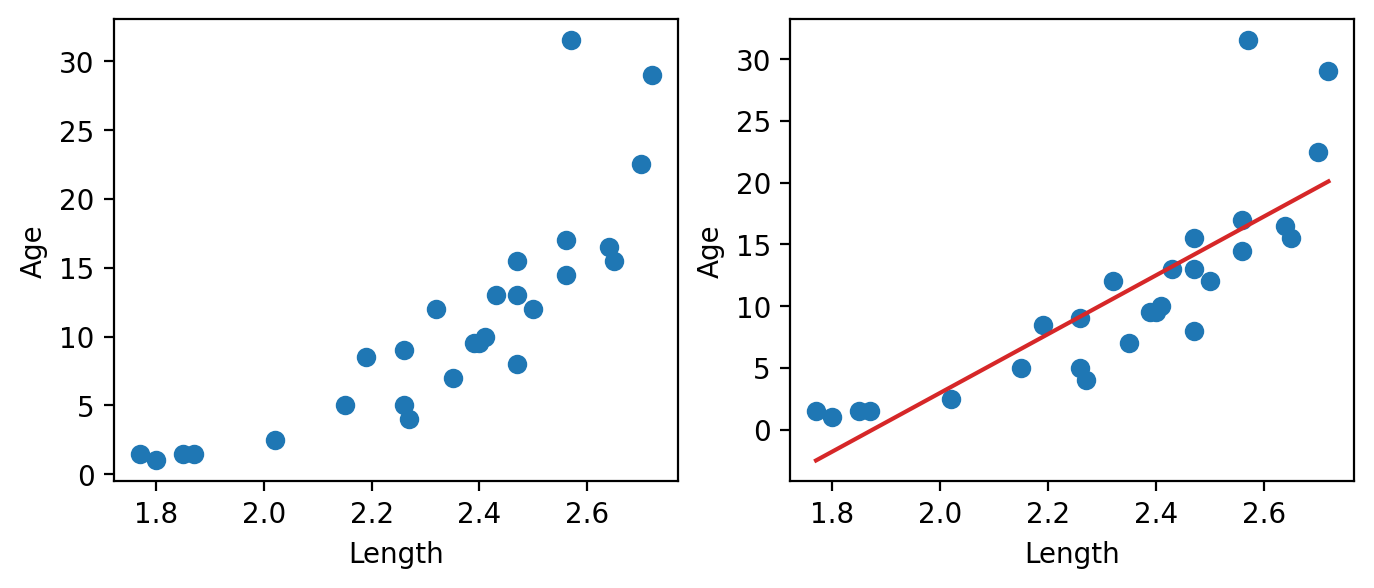

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

dugong = pd.read_csv("/Users/jordan.arlan/Documents/DS100/Data/dugong.csv", delimiter=",").sort_values("Length")
x, y = dugong["Length"], dugong["Age"]

# `corrcoef` computes the correlation coefficient between two variables
# `std` finds the standard deviation
r = np.corrcoef(x, y)[0, 1]
theta_1 = r*np.std(y)/np.std(x)
theta_0 = np.mean(y) - theta_1*np.mean(x)

fig, ax = plt.subplots(1, 2, dpi=200, figsize=(8, 3))
ax[0].scatter(x, y)
ax[0].set_xlabel("Length")
ax[0].set_ylabel("Age")

ax[1].scatter(x, y)
ax[1].plot(x, theta_0 + theta_1*x, "tab:red")
ax[1].set_xlabel("Length")
ax[1].set_ylabel("Age");

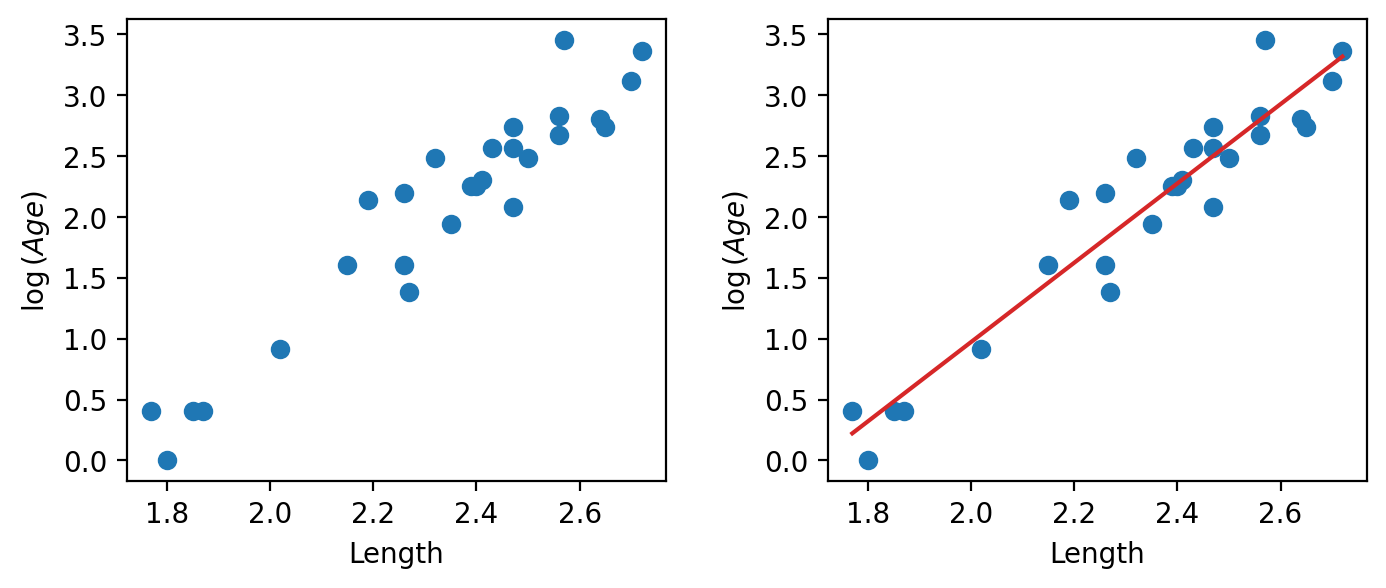

In [4]:
z = np.log(y)

r = np.corrcoef(x, z)[0, 1]
theta_1 = r*np.std(z)/np.std(x)
theta_0 = np.mean(z) - theta_1*np.mean(x)

fig, ax = plt.subplots(1, 2, dpi=200, figsize=(8, 3))
ax[0].scatter(x, z)
ax[0].set_xlabel("Length")
ax[0].set_ylabel(r"$\log{(Age)}$")

ax[1].scatter(x, z)
ax[1].plot(x, theta_0 + theta_1*x, "tab:red")
ax[1].set_xlabel("Length")
ax[1].set_ylabel(r"$\log{(Age)}$")

plt.subplots_adjust(wspace=0.3);

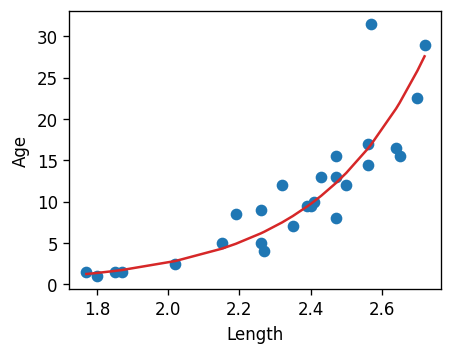

In [5]:
plt.figure(dpi=120, figsize=(4, 3))

plt.scatter(x, y)
plt.plot(x, np.exp(theta_0)*np.exp(theta_1*x), "tab:red")
plt.xlabel("Length")
plt.ylabel("Age");

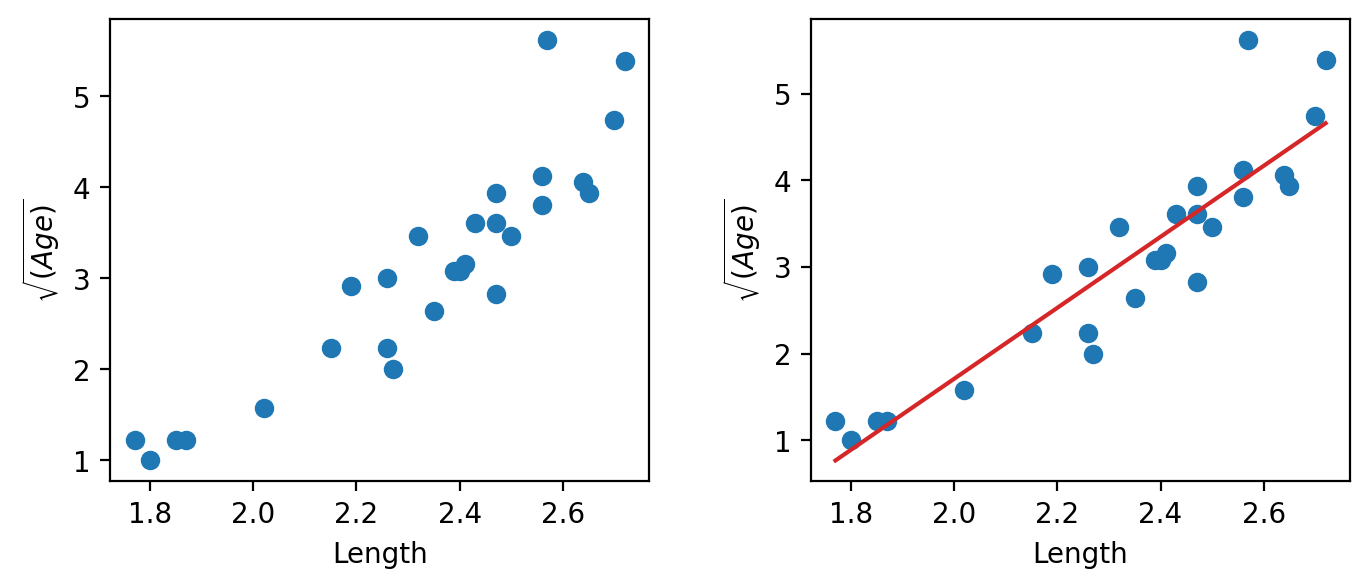

In [7]:
z = np.sqrt(y)

r = np.corrcoef(x, z)[0, 1]
theta_1 = r*np.std(z)/np.std(x)
theta_0 = np.mean(z) - theta_1*np.mean(x)

fig, ax = plt.subplots(1, 2, dpi=200, figsize=(8, 3))
ax[0].scatter(x, z)
ax[0].set_xlabel("Length")
ax[0].set_ylabel(r"$\sqrt{(Age)}$")

ax[1].scatter(x, z)
ax[1].plot(x, theta_0 + theta_1*x, "tab:red")
ax[1].set_xlabel("Length")
ax[1].set_ylabel(r"$\sqrt{(Age)}$")

plt.subplots_adjust(wspace=0.3);

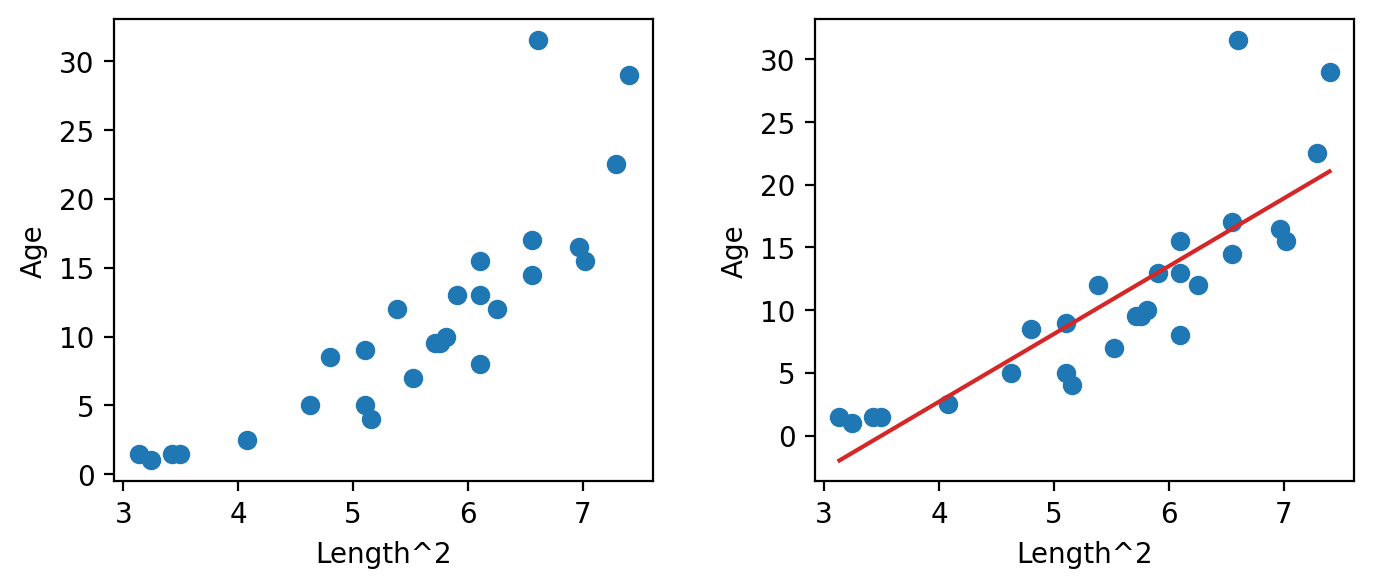

In [19]:
z = np.square(x)

r = np.corrcoef(z, y)[0, 1]
theta_1 = r*np.std(y)/np.std(z)
theta_0 = np.mean(y) - theta_1*np.mean(z)

fig, ax = plt.subplots(1, 2, dpi=200, figsize=(8, 3))
ax[0].scatter(z, y)
ax[0].set_xlabel(r"Length^2")
ax[0].set_ylabel(r"Age")

ax[1].scatter(z, y)
ax[1].plot(z, theta_0 + theta_1*z, "tab:red")
ax[1].set_xlabel(r"Length^2")
ax[1].set_ylabel(r"Age")

plt.subplots_adjust(wspace=0.3);

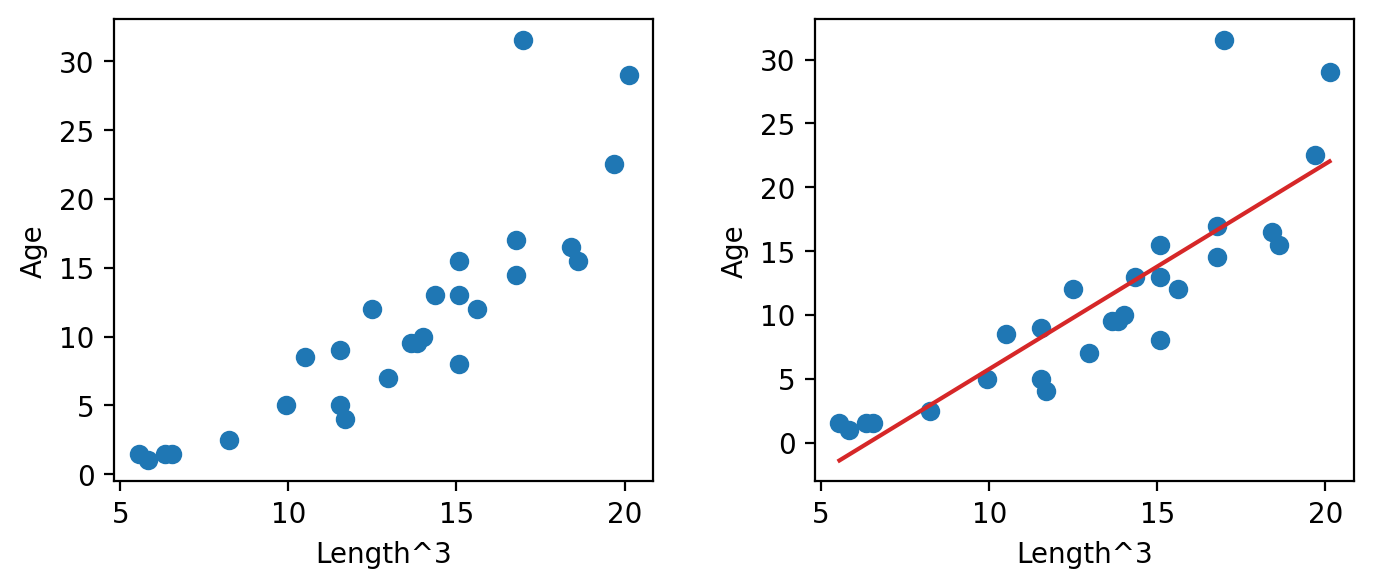

In [21]:
z = x**3

r = np.corrcoef(z, y)[0, 1]
theta_1 = r*np.std(y)/np.std(z)
theta_0 = np.mean(y) - theta_1*np.mean(z)

fig, ax = plt.subplots(1, 2, dpi=200, figsize=(8, 3))
ax[0].scatter(z, y)
ax[0].set_xlabel(r"Length^3")
ax[0].set_ylabel(r"Age")

ax[1].scatter(z, y)
ax[1].plot(z, theta_0 + theta_1*z, "tab:red")
ax[1].set_xlabel(r"Length^3")
ax[1].set_ylabel(r"Age")

plt.subplots_adjust(wspace=0.3);

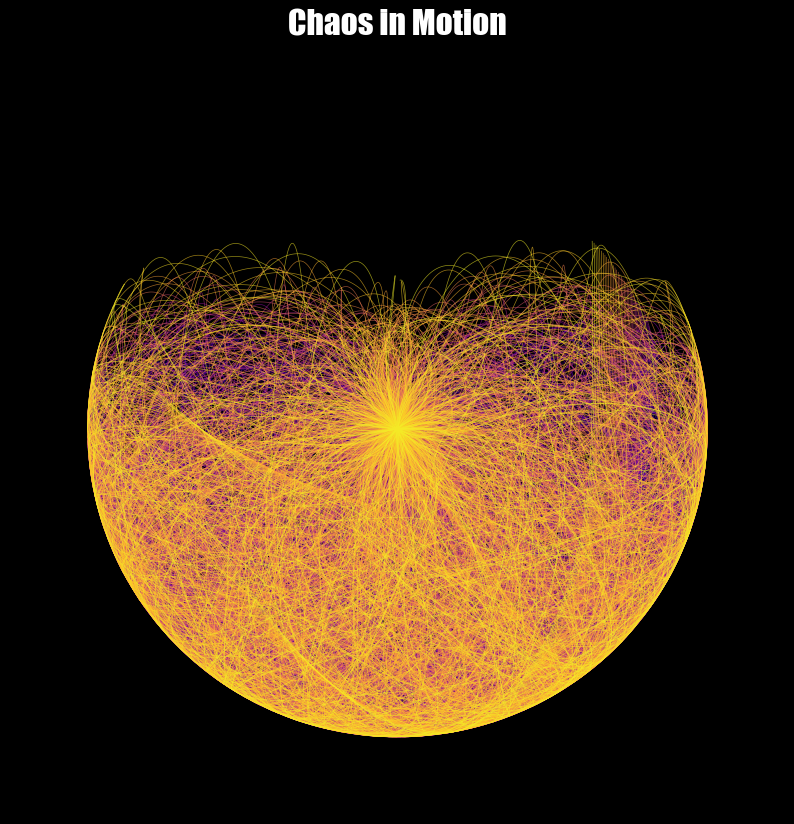

In [29]:
import matplotlib.pyplot as plt
from scipy.integrate import odeint

# Constants
G = 9.8  # gravity
L1 = 1.0  # length of pendulum 1
L2 = 1.0  # length of pendulum 2
M1 = 1.0  # mass of pendulum 1
M2 = 1.0  # mass of pendulum 2


# Initial conditions: theta1, dtheta1/dt, theta2, dtheta2/dt.
Y0 = [3*np.pi/7, 0, 3*np.pi/4, 0]

def equations(Y, t):
    theta1, z1, theta2, z2 = Y
    c, s = np.cos(theta1-theta2), np.sin(theta1-theta2)
    theta1_dot = z1
    z1_dot = (M2*G*np.sin(theta2)*c - M2*s*(L1*z1**2*c + L2*z2**2) - (M1+M2)*G*np.sin(theta1)) / L1 / (M1 + M2*s**2)
    theta2_dot = z2
    z2_dot = ((M1+M2)*(L1*z1**2*s - G*np.sin(theta2) + G*np.sin(theta1)*c) + M2*L2*z2**2*s*c) / L2 / (M1 + M2*s**2)
    return theta1_dot, z1_dot, theta2_dot, z2_dot


# Time array
t = np.linspace(0, 50, 5000)

# Integrate the ODE using scipy.integrate.
Y = odeint(equations, Y0, t)

# Extract theta values from the solution
theta1, theta2 = Y[:,0], Y[:,2]

# Convert theta to x, y coordinates
x1 = L1 * np.sin(theta1)
y1 = -L1 * np.cos(theta1)
x2 = x1 + L2 * np.sin(theta2)
y2 = y1 - L2 * np.cos(theta2)

# Create a color map to represent time
colors = plt.cm.viridis(np.linspace(0, 1, len(x2)))

# Define a function to calculate the pendulum path
def calculate_path(Y0):
    # Integrate the ODE using scipy.integrate.
    Y = odeint(equations, Y0, t)

    # Extract theta values from the solution
    theta1, theta2 = Y[:,0], Y[:,2]

    # Convert theta to x, y coordinates
    x1 = L1 * np.sin(theta1)
    y1 = -L1 * np.cos(theta1)
    x2 = x1 + L2 * np.sin(theta2)
    y2 = y1 - L2 * np.cos(theta2)

    return x2, y2

# Time array
t = np.linspace(0, 50, 5000)

# Create a new figure and axis, with a black background
fig, ax = plt.subplots(figsize=(10, 10))
fig.patch.set_facecolor('black')

# Simulate and plot the paths of multiple pendulums with slightly different initial conditions
for i in range(50):
    # Initial conditions: theta1, dtheta1/dt, theta2, dtheta2/dt.
    Y0 = [3*np.pi/7 + 0.01*i, 0, 3*np.pi/4 + 0.01*i, 0]
    x2, y2 = calculate_path(Y0)

    # Use the plasma color map for more contrast
    color = plt.cm.plasma(i / 50)

    # Plot the path of the pendulum with the color
    ax.plot(x2, y2, color=color, alpha=0.6, linewidth=0.5)

# Set the plot title with a specific font
plt.title('Chaos in Motion', color='white', fontsize=24, fontname='fantasy')

# Set the plot limits
plt.xlim([-2.5, 2.5])
plt.ylim([-2.5, 2.5])

# Add a subtle grid
ax.grid(True, linestyle='-', color='white', alpha=0.1)

# Remove labels and set the ticks color to white
ax.axis('off')
ax.tick_params(colors='white')

plt.show()


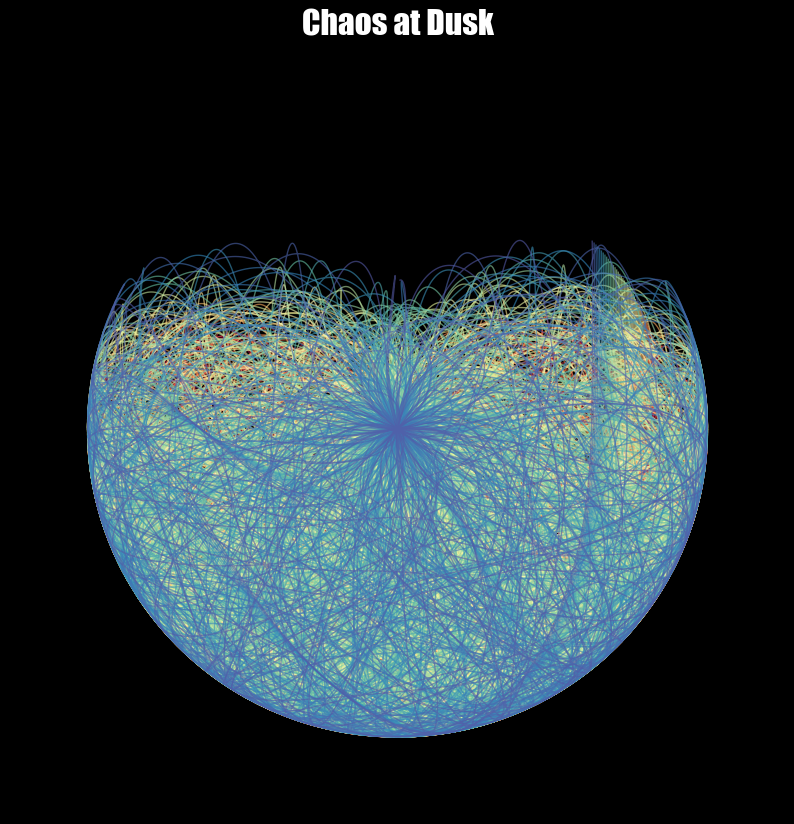

In [35]:
# Create a new figure and axis, with a black background
fig, ax = plt.subplots(figsize=(10, 10))
fig.patch.set_facecolor('black')

# Simulate and plot the paths of multiple pendulums with slightly different initial conditions
for i in range(50):
    # Initial conditions: theta1, dtheta1/dt, theta2, dtheta2/dt.
    Y0 = [3*np.pi/7 + 0.01*i, 0, 3*np.pi/4 + 0.01*i, 0]
    x2, y2 = calculate_path(Y0)

    # Create a color map to represent each pendulum
    color = plt.cm.Spectral(i / 50)

    # Plot the path of the pendulum with the color
    ax.plot(x2, y2, color=color, alpha=0.6, linewidth=1)

# Set the plot title with a specific font
plt.title('Chaos at Dusk', color='white', fontsize=24, fontname='fantasy')

# Set the plot limits
plt.xlim([-2.5, 2.5])
plt.ylim([-2.5, 2.5])

# Add a subtle grid
ax.grid(True, linestyle='-', color='white', alpha=0.5)

# Remove labels and set the ticks color to white
ax.axis('off')
ax.tick_params(colors='white')

plt.show()

